In [1]:
import mnist_loader

In [2]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [3]:
import network

In [4]:
net = network.Network([784, 64, 32, 16, 10])

In [5]:
net.SGD(training_data, 25, 64, 5.0, test_data=validation_data)

Epoch 0 : 8121 / 10000
Epoch 1 : 8954 / 10000
Epoch 2 : 8978 / 10000
Epoch 3 : 9198 / 10000
Epoch 4 : 9321 / 10000
Epoch 5 : 9360 / 10000
Epoch 6 : 9379 / 10000
Epoch 7 : 9403 / 10000
Epoch 8 : 9397 / 10000
Epoch 9 : 9431 / 10000
Epoch 10 : 9441 / 10000
Epoch 11 : 9477 / 10000
Epoch 12 : 9418 / 10000
Epoch 13 : 9435 / 10000
Epoch 14 : 9391 / 10000
Epoch 15 : 9496 / 10000
Epoch 16 : 9503 / 10000
Epoch 17 : 9331 / 10000
Epoch 18 : 9030 / 10000
Epoch 19 : 9470 / 10000
Epoch 20 : 9501 / 10000
Epoch 21 : 9445 / 10000
Epoch 22 : 9469 / 10000
Epoch 23 : 9512 / 10000
Epoch 24 : 9514 / 10000


In [6]:
net.num_layers

5

In [7]:
net.sizes

[784, 64, 32, 16, 10]

Text(0, 0.5, 'No. of Correctly classified images')

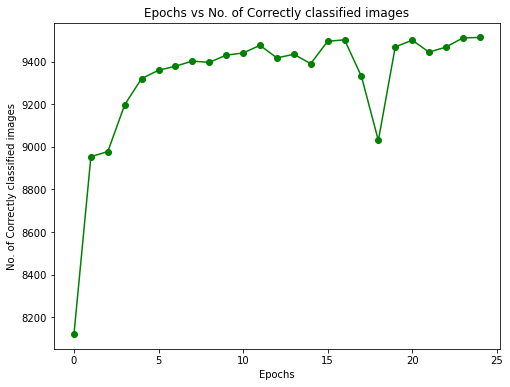

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(net.epochs,net.corrects, color='green', marker='o')
plt.title("Epochs vs No. of Correctly classified images")
plt.xlabel("Epochs")
plt.ylabel("No. of Correctly classified images")

Text(0, 0.5, 'Error %')

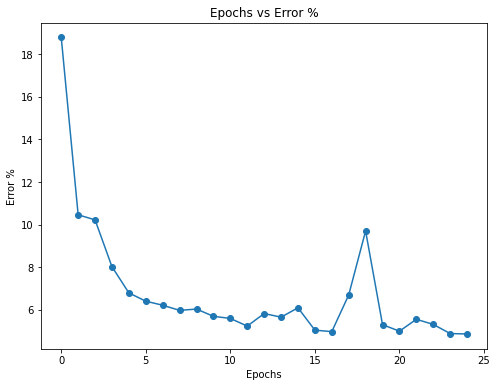

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(net.epochs,net.error_percentages, marker='o')
plt.title("Epochs vs Error %")
plt.xlabel("Epochs")
plt.ylabel("Error %")

In [10]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [11]:
test_results = [(np.argmax(net.feedforward(x)), y)
                        for (x, y) in test_data]

In [9]:
test_results = net.get_test_results(test_data)

In [14]:
actuals=[]
predictions=[]
for (x,y) in test_results:
    actuals.append(x)
    predictions.append(y)

In [15]:
accuracy_score(actuals, predictions)*100

94.75

In [16]:
report = classification_report(actuals, predictions, output_dict=True)

In [17]:
import pandas as pd

In [18]:
classification_df = pd.DataFrame(report)

In [23]:
classification_df.T

,precision,recall,f1-score,support
0,0.973469,0.963636,0.968528,990.0000
1,0.980617,0.980617,0.980617,1135.0000
2,0.946705,0.940327,0.943506,1039.0000
3,0.944554,0.914669,0.929372,1043.0000
4,0.943992,0.942073,0.943032,984.0000
5,0.901345,0.959427,0.929480,838.0000
6,0.971816,0.944219,0.957819,986.0000
7,0.947471,0.953967,0.950708,1021.0000
8,0.925051,0.948421,0.936590,950.0000
9,0.931615,0.927022,0.929313,1014.0000


In [26]:
classification_df.T.to_csv('./data/classification_report_mnist.csv')

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

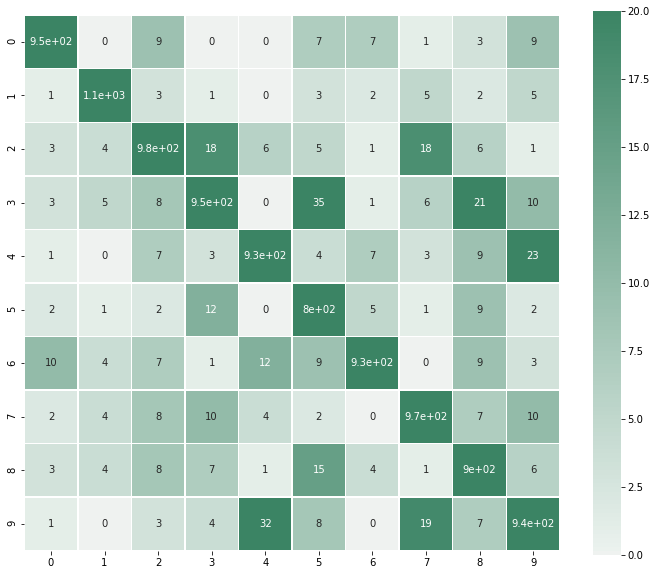

In [25]:
f, ax = plt.subplots(figsize = (12, 10))
c_matrix = confusion_matrix(actuals, predictions)
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix, center = 0, cmap=c_map, annot= True, square = True, linewidths= 0.5)